In [1]:
!curl -L -O http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tarfile
import os
import pickle as pkl
import numpy as np
import skimage
import skimage.io
import skimage.transform
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
%matplotlib inline

mnist = input_data.read_data_sets('MNIST_data')

BST_PATH = 'BSR_bsds500.tgz'

rand = np.random.RandomState(42)

f = tarfile.open(BST_PATH)
train_files = []
for name in f.getnames():
    if name.startswith('BSR/BSDS500/data/images/train/'):
        train_files.append(name)

print('Loading BSR training images')
background_data = []
for name in train_files:
    try:
        fp = f.extractfile(name)
        bg_img = skimage.io.imread(fp)
        background_data.append(bg_img)
    except:
        continue


def compose_image(digit, background):
    """Difference-blend a digit and a random patch from a background image."""
    w, h, _ = background.shape
    dw, dh, _ = digit.shape
    x = np.random.randint(0, w - dw)
    y = np.random.randint(0, h - dh)
    
    bg = background[x:x+dw, y:y+dh]
    return np.abs(bg - digit).astype(np.uint8)


def mnist_to_img(x):
    """Binarize MNIST digit and convert to RGB."""
    x = (x > 0).astype(np.float32)
    d = x.reshape([28, 28, 1]) * 255
    return np.concatenate([d, d, d], 2)


def create_mnistm(X):
    """
    Give an array of MNIST digits, blend random background patches to
    build the MNIST-M dataset as described in
    http://jmlr.org/papers/volume17/15-239/15-239.pdf
    """
    X_ = np.zeros([X.shape[0], 28, 28, 3], np.uint8)
    for i in range(X.shape[0]):

        if i % 1000 == 0:
            print('Processing example', i)

        bg_img = rand.choice(background_data)

        d = mnist_to_img(X[i])
        d = compose_image(d, bg_img)
        X_[i] = d

    return X_


print('Building train set...')
train = create_mnistm(mnist.train.images)
print('Building test set...')
test = create_mnistm(mnist.test.images)
print('Building validation set...')
valid = create_mnistm(mnist.validation.images)

# Save dataset as pickle
with open('mnistm_data.pkl', 'wb') as f:
    pkl.dump({ 'train': train, 'test': test, 'valid': valid }, f, pkl.HIGHEST_PROTOCOL)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 67.4M  100 67.4M    0     0  1101k      0  0:01:02  0:01:02 --:--:-- 4434k


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Loading BSR training images
Building tr

In [0]:
import numpy as np  
import os  
import matplotlib.pyplot as plt 
import tensorflow as tf
from __future__ import division
import pickle


train_data=train/255
valid_data=test/255
test_data=valid/255

In [4]:

X=tf.placeholder(tf.float32,[None , 784*3])
X_origin=tf.reshape(X,[-1,28,28,3])
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 2, 2, 1], padding = 'SAME')

def deconv2d(x, W, output_shape):
    return tf.nn.conv2d_transpose(x, W, output_shape, strides = [1, 2, 2, 1], padding = 'SAME')
weights={
        'w1' :tf.Variable(tf.random_normal([5,5,3,16])),
        'w2' :tf.Variable(tf.random_normal([5,5,16,32])),
        'w3' :tf.Variable(tf.random_normal([5,5,16,32])), 
        'w4' :tf.Variable(tf.random_normal([5,5,3,16])) 
        }
biases={
      'b1' :tf.Variable(tf.random_normal([16])) ,
      'b2'  :tf.Variable(tf.random_normal([32])), 
      'b3' :tf.Variable(tf.random_normal([16])), 
      'b4' :tf.Variable(tf.random_normal([3]))  
        }
h_e_conv1 = tf.nn.sigmoid(tf.add(conv2d(X_origin, weights['w1']),biases['b1']))

h_e_conv2 = tf.nn.sigmoid(tf.add(conv2d(h_e_conv1, weights['w2']),biases['b2']))

output_shape_d_conv1 = tf.stack([tf.shape(X)[0], 14, 14, 16])
h_d_conv1 = tf.nn.sigmoid(tf.add(deconv2d(h_e_conv2, weights['w3'], output_shape_d_conv1),biases['b3']))
output_shape_d_conv2 = tf.stack([tf.shape(X)[0], 28, 28, 3])
h_d_conv2 = tf.nn.sigmoid(tf.add(deconv2d(h_d_conv1, weights['w4'], output_shape_d_conv2),biases['b4']))


cost = tf.reduce_mean(tf.pow(h_d_conv2 - X_origin, 2))
optimizer = tf.train.AdamOptimizer(0.01).minimize(cost)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:

sess = tf.InteractiveSession()
batch_size = 100
init_op = tf.global_variables_initializer()

sess.run(init_op)

t=np.reshape(train_data,(55000,28*28*3))
error=[]
for epoach in range(20):
    tmp=[]
    for i in range(int(59000/batch_size)):  
        batch=t[i*batch_size:(i+1)*batch_size]
        _,tmp1=sess.run([optimizer,cost],feed_dict={X:batch})
        tmp.append(tmp1)
        if i%50==0:
            print (i,'train loss and accuracy : ',sess.run(cost,feed_dict={X:batch}))
    error.append(np.mean(tmp))    

0 train loss and accuracy :  0.22597083
50 train loss and accuracy :  0.09799335
100 train loss and accuracy :  0.06303006
150 train loss and accuracy :  0.043174066
200 train loss and accuracy :  0.036656443
250 train loss and accuracy :  0.03437347
300 train loss and accuracy :  0.030310512
350 train loss and accuracy :  0.028969724
400 train loss and accuracy :  0.029942026
450 train loss and accuracy :  0.027577465
500 train loss and accuracy :  0.0262525
550 train loss and accuracy :  nan
0 train loss and accuracy :  0.079506904
50 train loss and accuracy :  0.023968386
100 train loss and accuracy :  0.021521399
150 train loss and accuracy :  0.021829026
200 train loss and accuracy :  0.020912966
250 train loss and accuracy :  0.021579769
300 train loss and accuracy :  0.019058228
350 train loss and accuracy :  0.019218547
400 train loss and accuracy :  0.019304292
450 train loss and accuracy :  0.0177642
500 train loss and accuracy :  0.017445069
550 train loss and accuracy :  na

In [18]:

gpu_opt=tf.GPUOptions(per_process_gpu_memory_fraction=0.8)
config=tf.ConfigProto(log_device_placement=True,gpu_options=gpu_opt)
sess = tf.InteractiveSession(config=config)
batch_size = 100
init_op = tf.global_variables_initializer()

sess.run(init_op)

t=np.reshape(train_data,(55000,28*28*3))
error=[]
for epoach in range(20):
    tmp=0
    for i in range(int(55000/batch_size)):  
        batch=t[i*batch_size:(i+1)*batch_size]
        _,tmp1=sess.run([optimizer,cost],feed_dict={X:batch})
        tmp += tmp1
    
    print (i,'train loss and accuracy : ',tmp/(i+1))
    error.append(tmp/(i+1))    
        
        

Device mapping:
/job:localhost/replica:0/task:0/device:XLA_CPU:0 -> device: XLA_CPU device
/job:localhost/replica:0/task:0/device:XLA_GPU:0 -> device: XLA_GPU device
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7



/tensorflow-1.15.0/python3.6/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


549 train loss and accuracy :  0.041962673115459356
549 train loss and accuracy :  0.0164357285133817
549 train loss and accuracy :  0.012955159897154027
549 train loss and accuracy :  0.011489168644290079
549 train loss and accuracy :  0.010517365714027123
549 train loss and accuracy :  0.009821804814379324
549 train loss and accuracy :  0.009460136113180355
549 train loss and accuracy :  0.0090165019297803
549 train loss and accuracy :  0.00865295064042915
549 train loss and accuracy :  0.008503260375423864
549 train loss and accuracy :  0.008028038801117377
549 train loss and accuracy :  0.007790161520242691
549 train loss and accuracy :  0.007565564925528385
549 train loss and accuracy :  0.007427368545904756
549 train loss and accuracy :  0.007142695598304272
549 train loss and accuracy :  0.007142041294242848
549 train loss and accuracy :  0.006744602524929426
549 train loss and accuracy :  0.006651805064386942
549 train loss and accuracy :  0.006492462105710398
549 train loss an

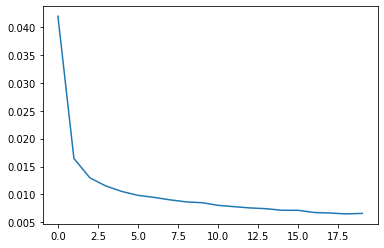

In [19]:
plt.plot(range(epoach+1),error,label='learning_curve')
plt.show()

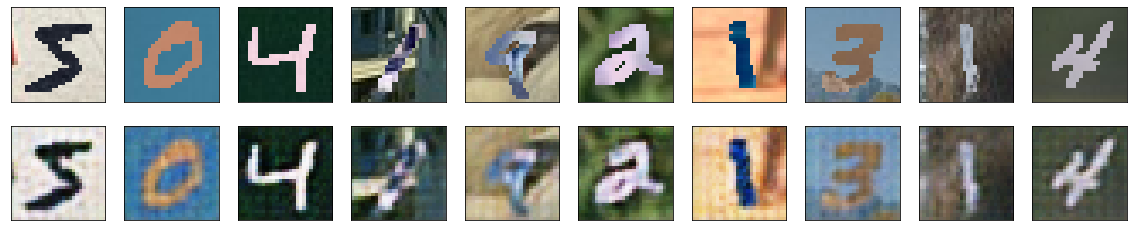

In [20]:
def plot_n_reconstruct(origin_img, reconstruct_img, n = 10):

    plt.figure(figsize=(2 * 10, 4))

    for i in range(n):
        # display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(origin_img[i].reshape(28, 28,3))
        #plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstruct_img[i].reshape(28, 28,3))
        #plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
test_size = 10
test_data1=test_data[:test_size]
#test_data1=test_data1[:,:,:,2]
test=np.reshape(test_data1,(10,28*28*3))

test_reconstruct_img = np.reshape(h_d_conv2.eval(feed_dict = {X: test}), [-1, 28 * 28*3])

plot_n_reconstruct(test, test_reconstruct_img)